<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Sistema Predictor de grupos relacionados por el diagnóstico</font></b></h1>
        <h2><font color='0B5345'>Luisa Enciso - María Ostos - Santiago Rivera</font></h2>
    </div>
</div>


In [4]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt

In [5]:
def mostrar_informe(df):
    print("Informe estadístico de la base de datos")
    print("="*50, "\n")

    # 1. Información general
    print(f"Número de registros: {df.shape[0]}")
    print(f"Número de columnas: {df.shape[1]}\n")

    # 2. Valores nulos por columna
    print("Valores nulos por columna:")
    print(df.isna().sum())
    print("\n")

    # 3. Valores únicos por columna
    print("Número de valores únicos por columna:")
    print(df.nunique())
    print("\n")

    # 4. Estadísticas descriptivas para columnas numéricas
    print("Estadísticas descriptivas (numéricas):")
    print(df.describe())
    print("\n")

    # 5. Frecuencias para variables categóricas
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        print("Frecuencias para variables categóricas:")
        for col in cat_cols:
            print(f"\nColumna: {col}")
            print(df[col].value_counts(dropna=False))
    else:
        print("No se encontraron columnas categóricas.")

<hr>

# **Inspección de la base de datos**

In [8]:
# Ruta del archivo Excel
archivo_excel = 'DataBase.xlsx'
# Cargar el archivo Excel
df = pd.read_excel(archivo_excel, engine='openpyxl')
# Mostrar las primeras filas
df.head()

,Num caso,Aseguradora -Código-,Aseguradora -Descripción-,Edad,Grupo Edad,Sexo,Codigo de ciudad,Fecha de ingreso,Tipo de ingreso,Fecha de egreso,...,Proc28,Proc29,Proc30,Tipo servicio,Causa Basica de muerte,Infecciones,Infección Quirurgica,GRD -Código,GRD -Descripción,Tipo GRD
0,413799.0,204,Aseguradora_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,412359.0,313,Aseguradora_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,Aseguradora_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,Aseguradora_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,Aseguradora_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M


## **Informe Estadístico Inicial de la Base de Datos**

In [9]:
df_informe = pd.read_excel(archivo_excel, engine='openpyxl')
mostrar_informe(df_informe)

Informe estadístico de la base de datos

Número de registros: 27869
Número de columnas: 68

Valores nulos por columna:
Num caso                     1
Aseguradora -Código-         0
Aseguradora -Descripción-    0
Edad                         0
Grupo Edad                   0
                            ..
Infecciones                  0
Infección Quirurgica         0
GRD -Código                  0
GRD -Descripción             0
Tipo GRD                     0
Length: 68, dtype: int64


Número de valores únicos por columna:
Num caso                     7900
Aseguradora -Código-           62
Aseguradora -Descripción-      71
Edad                          108
Grupo Edad                     20
                             ... 
Infecciones                     4
Infección Quirurgica            4
GRD -Código                   608
GRD -Descripción              608
Tipo GRD                        4
Length: 68, dtype: int64


Estadísticas descriptivas (numéricas):
            Num caso  Aseguradora -

## 1. Descripción General

- **Número total de registros:** 27,869
- **Número total de columnas:** 68

Este informe presenta un análisis descriptivo preliminar con el fin de entender la estructura, calidad y características generales del conjunto de datos.



## 2. Calidad de los Datos

- **Valores nulos por columna:**
    
    La mayoría de las columnas no presentan valores nulos. Se identifica 1 registro con valor nulo en la columna `Num caso`.
      



## 3. Distribución de Datos Categóricos

Se presentan las frecuencias de las principales variables categóricas para identificar posibles valores atípicos o inconsistencias, además de observar la distribución general:

- **Sexo:**
    - Masculino (M): 14,353
    - Femenino (F): 13,512
    - Valores inconsistentes (m, f): 4 (corregir para homogeneizar)
- **Tipo de ingreso:**
    - Urgencia: 25,570
    - Programado: 2,294
    - Valores inconsistentes (variaciones en mayúsculas/minúsculas): corregir para uniformidad
- **Cuidados intensivos:**
    - NO: 26,681
    - SI: 1,182
    - Valores inconsistentes (variaciones en mayúsculas/minúsculas): corregir
- **Grupo Etario:**
    
    Distribución detallada por rangos de edad, destacando grupos mayores (75-79, 80-84 años) con mayor frecuencia.
    
- **Aseguradora:**
    
    71 categorías, con 5 aseguradoras predominantes que concentran la mayoría de los registros.
    
- **Diagnósticos (Dx principal y Dxr 1-9):**
    
    Amplia variedad con valores NaN significativos en las últimas columnas de diagnósticos secundarios.
    


## 4. Estadísticas Descriptivas para Variables Numéricas

- **Edad:**
    - Media: 57.7 años
    - Rango: 0 a 109 años
    - Desviación estándar: 24.17
- **Días de estancia hospitalaria:**
    - Media: 8.45 días
    - Rango: 0 a 174 días
    - Mediana: 6 días
- **Días en Unidad de Cuidados Intensivos:**
    - Media: 0.38 días
    - Alta dispersión con máximo de 92 días, pero la mayoría sin estancia en UCI.
    
- **Variables de Procedimientos (Proc22 a Proc30):**
    
    Presentan muchos valores faltantes (solo disponibles en pocas observaciones), con medias alrededor de 83-89 y alta variabilidad en algunos casos. Se debe evaluar relevancia para análisis futuros.
    



## 5. Observaciones Generales
- Unificar formatos en variables categóricas (ej. mayúsculas/minúsculas).
- Tratar valores faltantes, en particular en columnas diagnósticas y procedimientos.
- Validar posibles registros duplicados.
- Eliminar categorías muy específicas o poco frecuentes en variables categóricas para evitar ruido.



## 6. Conclusiones preliminares

El dataset es amplio y contiene información clínica valiosa. Se evidencia buena calidad general en términos de datos faltantes, salvo excepciones puntuales. La distribución etaria y los diagnósticos principales presentan un perfil coherente para un estudio de análisis de gestión hospitalaria. Sin embargo, es imprescindible realizar un proceso de limpieza y transformación para garantizar la calidad y precisión en análisis posteriores.

<hr>

# **Limpieza de la base de datos**

In [10]:
# ====================================================================
# 1. LIMPIEZA BÁSICA DE TEXTO
# ====================================================================
# Se estandarizan los textos a mayúsculas y se eliminan las tildes,
# aplicando esta limpieza únicamente a las columnas de tipo string
# (sin afectar columnas numéricas). Además, se normalizan los nombres
# de las columnas.
# ====================================================================

def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = texto.upper()
        texto = unicodedata.normalize('NFKD', texto)
        texto = ''.join([c for c in texto if not unicodedata.combining(c)])
        return texto
    return texto

# Aplicar solo a columnas de texto
columnas_texto = df.select_dtypes(include='object').columns
df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)

# Limpiar nombres de columnas
df.columns = [limpiar_texto(col) for col in df.columns]

df.head()


<ipython-input-10-3508867996>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)


,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,PROC28,PROC29,PROC30,TIPO SERVICIO,CAUSA BASICA DE MUERTE,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,ASEGURADORA_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC,M
1,412359.0,313,ASEGURADORA_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,ASEGURADORA_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,ASEGURADORA_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,ASEGURADORA_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...,M


In [11]:
# ================================================================
# 2. ANÁLISIS DE CALIDAD DE LAS COLUMNAS
# ================================================================
# Se realiza un diagnóstico exploratorio por columna que incluye:
# - Conteo de valores nulos
# - Número de valores únicos
# - Ejemplos representativos de valores
# - Identificación de columnas con baja utilidad (e.g., constantes)
# ================================================================

print('--- Valores NaN por columna ---')
print(df.isna().sum())

descripcion_columnas = []
for col in df.columns:
    valores_unicos = df[col].nunique(dropna=True)
    muestra_valores = df[col].unique()[:5]
    descripcion_columnas.append({
        'columna': col,
        'valores_unicos': valores_unicos,
        'muestra_valores': muestra_valores
    })

print('\n--- Resumen de columnas ---')
for desc in descripcion_columnas:
    print(f"Columna: {desc['columna']}")
    print(f"  Valores únicos: {desc['valores_unicos']}")
    print(f"  Ejemplo de valores: {desc['muestra_valores']}")
    if desc['valores_unicos'] == 1:
        print('  -> ¡OJO! Solo hay un valor único.')
    print()
df.head()

--- Valores NaN por columna ---
NUM CASO                     1
ASEGURADORA -CODIGO-         0
ASEGURADORA -DESCRIPCION-    0
EDAD                         0
GRUPO EDAD                   0
                            ..
INFECCIONES                  0
INFECCION QUIRURGICA         0
GRD -CODIGO                  0
GRD -DESCRIPCION             0
TIPO GRD                     0
Length: 68, dtype: int64

--- Resumen de columnas ---
Columna: NUM CASO
  Valores únicos: 7900
  Ejemplo de valores: [413799. 412359. 412552. 414131. 410573.]

Columna: ASEGURADORA -CODIGO-
  Valores únicos: 62
  Ejemplo de valores: [204 313 227 112 221]

Columna: ASEGURADORA -DESCRIPCION-
  Valores únicos: 71
  Ejemplo de valores: ['ASEGURADORA_29' 'ASEGURADORA_56' 'ASEGURADORA_46' 'ASEGURADORA_21'
 'ASEGURADORA_28']

Columna: EDAD
  Valores únicos: 108
  Ejemplo de valores: [38 27 39 24 60]

Columna: GRUPO EDAD
  Valores únicos: 20
  Ejemplo de valores: ['35-39' '25-29' '20-24' '60-64' '75-79']

Columna: SEXO
  Valore

,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,PROC28,PROC29,PROC30,TIPO SERVICIO,CAUSA BASICA DE MUERTE,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,ASEGURADORA_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC,M
1,412359.0,313,ASEGURADORA_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,ASEGURADORA_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,ASEGURADORA_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,ASEGURADORA_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...,M


In [12]:
# =============================================================================
# 3. NORMALIZACIÓN DE VALORES EQUIVALENTES
# =============================================================================
# Se unifican valores semánticamente equivalentes que presentan
# diferencias en su escritura. Ejemplo: "URGENCIAS PEDIATRICAS" → "URGENCIA".
# Esta etapa mejora la consistencia y reduce la cardinalidad de las categorías.
# =============================================================================

normalizaciones = {
    'TIPO DE INGRESO': {
        'URGENCIAS': 'URGENCIA',
        'URGENCIA ADULTOS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
        'URGENCIA PEDIATRICA': 'URGENCIA',
        'URGENCIA OBSTETRICA': 'URGENCIA',
    },
    'SITUACION AL ALTA': {
        'MUERTO': 'FALLECIDO',
        'DEFUNCION': 'FALLECIDO',
    },
    'SERVICIOALTA': {
        'URGENCIAS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
    }
}

for columna, reemplazos in normalizaciones.items():
    if columna in df.columns:
        df[columna] = df[columna].replace(reemplazos)

print("Valores equivalentes normalizados.")
df.head()

Valores equivalentes normalizados.


,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,PROC28,PROC29,PROC30,TIPO SERVICIO,CAUSA BASICA DE MUERTE,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,ASEGURADORA_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC,M
1,412359.0,313,ASEGURADORA_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,ASEGURADORA_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,ASEGURADORA_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,ASEGURADORA_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...,M


In [13]:
# ==========================================================================
# 4. ELIMINACIÓN DE COLUMNAS PROBLEMÁTICAS
# ==========================================================================
# Se descartan columnas que aportan poco valor al análisis:
# - Columnas con más del 70% de valores nulos
# - Columnas con un único valor distinto (baja variabilidad)
# - Columnas administrativas o irrelevantes para el objetivo del análisis
# ==========================================================================

# Columnas con muchos nulos
umbral_nan = 0.7
columnas_a_eliminar = df.columns[df.isna().mean() > umbral_nan].tolist()

# Columnas con un solo valor
columnas_un_valor = [col for col in df.columns if df[col].nunique() == 1]

# Columnas irrelevantes conocidas
columnas_irrelevantes = [
    'NUM CASO', 'ASEGURADORA -CODIGO-', 'ASEGURADORA -DESCRIPCION-', 'CODIGO DE CIUDAD',
    'FECHA DE EGRESO', 'CODIGO CAUSA EXTERNA', 'DIAS ESTANCIA', 'SERVICIOALTA',
    'CUIDADOS INTENSIVOS', 'DIAS DE UNIDAD CUIDADO INTENSIVO',
    'SITUACION AL ALTA', 'CAUSA BASICA DE MUERTE', 'INFECCIONES',
    'INFECCION QUIRURGICA', 'DX PRINCIPAL DE EGRESO ', 'DX PRINCIPAL DE EGRESO .1',
    'TIPO SERVICIO', 'PROC1','PROC2','PROC3', 'GRD -DESCRIPCION', 'TIPO GRD','GRUPO EDAD','DX DE INGRESO'
]

# Unificar y eliminar
todas_a_eliminar = list(set(columnas_a_eliminar + columnas_un_valor + columnas_irrelevantes))
df = df.drop(columns=[col for col in todas_a_eliminar if col in df.columns])
print(f"Columnas eliminadas: {todas_a_eliminar}")
df.head()

Columnas eliminadas: ['DIAS DE UNIDAD CUIDADO INTENSIVO', 'ASEGURADORA -DESCRIPCION-', 'PROC18', 'PROC2', 'DX DE INGRESO', 'SITUACION AL ALTA', 'PROC3', 'PROC20', 'ASEGURADORA -CODIGO-', 'PROC23', 'GRD -DESCRIPCION', 'PROC5', 'DX PRINCIPAL DE EGRESO .1', 'DX PRINCIPAL DE EGRESO ', 'DIAS ESTANCIA', 'CODIGO CAUSA EXTERNA', 'PROC27', 'PROC13', 'PROC29', 'FECHA DE EGRESO', 'PROC6', 'PROC7', 'DXR 10 ', 'PROC9', 'PROC16', 'PROC10', 'PROC17', 'SERVICIOALTA', 'PROC14', 'CAUSA BASICA DE MUERTE', 'PROC28', 'PROC8', 'PROC11', 'PROC26', 'NUM CASO', 'TIPO GRD', 'CAUSA EXTERNA', 'PROC19', 'PROC30', 'CODIGO DE CIUDAD', 'PROC15', 'PROC24', 'CUIDADOS INTENSIVOS', 'INFECCIONES', 'PROC4', 'PROC22', 'DXR 7', 'PROC12', 'PROC21', 'DXR 8', 'INFECCION QUIRURGICA', 'GRUPO EDAD', 'PROC25', 'PROC1', 'DXR 9', 'TIPO SERVICIO']


,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
0,38,F,30052005,URGENCIA,INFARTO CEREBRAL,I652,C189,C787,C788,N390,A048,14143
1,27,M,11032005,URGENCIA,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B210,B204,B162,A530,D538,A071,184153
2,39,M,20032005,URGENCIA,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B451,G052,B588,D70,D698,A072,184153
3,24,M,20062005,URGENCIA,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B200,B210,A600,N518,A530,A073,184153
4,60,M,24112004,URGENCIA,COMPLICACIONES DE PROCEDIMIENTOS NO CLASIFICAD...,Y838,C140,N390,B961,B962,A099,184112


In [14]:
# ================================================================
# 5. CODIFICACIÓN DE VARIABLES
# ================================================================
# - Variables binarias: codificar con 0 y 1.
# - Variables categóricas frecuentes: codificar por frecuencia.
# ================================================================

from sklearn.preprocessing import MinMaxScaler

# 1. Codificación binaria
df['SEXO'] = df['SEXO'].map({'F': 0, 'M': 1})
df['TIPO DE INGRESO'] = df['TIPO DE INGRESO'].map({'PROGRAMADO': 0, 'URGENCIA': 1})

# 2. Codificación por frecuencia (excepto última columna)
columnas_objetivo = df.columns[:-1]  # Todas menos la última

for col in columnas_objetivo:
    if col in df.columns:
        df[col] = df[col].map(df[col].value_counts())

df.head()



,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
0,200,13514,81,25574,92,26.0,18.0,21.0,3.0,95.0,2.0,14143
1,231,14355,85,25574,13,8.0,7.0,1.0,9.0,7.0,1.0,184153
2,176,14355,88,25574,10,2.0,2.0,1.0,78.0,10.0,1.0,184153
3,251,14355,64,25574,127,11.0,3.0,10.0,8.0,2.0,1.0,184153
4,408,14355,2,25574,226,269.0,1.0,256.0,77.0,71.0,31.0,184112


In [15]:
# ================================================================
# 6. NORMALIZACIÓN MIN-MAX
# ================================================================
# - Se imputan NaN con 0
# - Se suma un pequeño epsilon para evitar ceros exactos
# - Se aplica MinMaxScaler para escalar al rango [0, 1]
# - Se reconstruye el DataFrame con los nombres originales
# ================================================================


from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. Reemplazar NaN por 0
df_clean = df.fillna(0)

# 2. Aumentar ligeramente los valores excepto la última columna
epsilon = 1e-3
df_adjusted = df_clean.copy()
df_adjusted.iloc[:, :-1] += epsilon  # Solo las columnas excepto la última

# 3. Aplicar MinMaxScaler solo a las columnas excepto la última
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_adjusted.iloc[:, :-1])

# 4. Reconstruir el DataFrame escalado
df_f= pd.DataFrame(scaled_values, columns=df.columns[:-1])

# 5. Agregar la última columna sin modificar
df_f[df.columns[-1]] = df_adjusted[df.columns[-1]]

# 6. Confirmación
print("Normalización Min-Max aplicada.")
df_f.head()



Normalización Min-Max aplicada.


<ipython-input-15-1610336004>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        200.001
1        231.001
2        176.001
3        251.001
4        408.001
          ...   
27864    213.001
27865    501.001
27866    102.001
27867    221.001
27868    359.001
Name: EDAD, Length: 27869, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_adjusted.iloc[:, :-1] += epsilon  # Solo las columnas excepto la última
<ipython-input-15-1610336004>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        13514.001
1        14355.001
2        14355.001
3        14355.001
4        14355.001
           ...    
27864    13514.001
27865    14355.001
27866    13514.001
27867    14355.001
27868    14355.001
Name: SEXO, Length: 27869, dtype: float64' has dtype incompatible with int64, please explicit

,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
0,0.336717,0.0,0.720721,1.0,0.066423,0.018895,0.009793,0.012774,0.002669,0.135714,0.003781,14143
1,0.389171,1.0,0.756757,1.0,0.008759,0.005814,0.003808,0.000608,0.008007,0.010000,0.001890,184153
2,0.296108,1.0,0.783784,1.0,0.006569,0.001453,0.001088,0.000608,0.069395,0.014286,0.001890,184153
3,0.423012,1.0,0.567568,1.0,0.091971,0.007994,0.001632,0.006083,0.007117,0.002857,0.001890,184153
4,0.688663,1.0,0.009009,1.0,0.164234,0.195494,0.000544,0.155718,0.068505,0.101429,0.058601,184112


In [16]:
# ====================================================================================================
# 7. SELECCIÓN DE CLASES PREDICTORAS
# ====================================================================================================
# Reduce la cantidad de clases a predecir, limitando el problema a los 30 GRDs más frecuentes.
# ====================================================================================================

N = 30
top_grds = df_f['GRD -CODIGO'].value_counts().head(N).index
df_filtered = df_f[df['GRD -CODIGO'].isin(top_grds)].copy()
df_filtered.head()


,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
5,0.859560,1.0,0.693694,1.0,0.354015,0.209302,0.019587,0.023723,0.112100,0.135714,0.058601,54123
12,0.522843,1.0,0.702703,0.0,0.356204,0.058140,0.224157,0.091849,0.000890,0.002857,0.058601,174133
15,0.296108,1.0,0.738739,0.0,0.356204,0.008721,0.051687,0.078467,0.069395,0.462857,0.058601,174132
16,0.664975,0.0,0.576577,1.0,0.867153,0.293605,1.000000,0.130170,0.476868,0.135714,0.058601,44172
17,0.324873,1.0,0.612613,0.0,0.356204,0.029070,0.224157,0.054745,0.351423,0.030000,0.058601,174133


## **Guardar Base de datos limpia**



In [17]:
# ==============================================================================
# 8. GUARDADO FINAL
# ==============================================================================
# Se guarda el DataFrame limpio y normalizado para futuras etapas del pipeline.
# ==============================================================================

df_filtered.to_csv('DataBaseFinal_Normalizado.csv', index=False, sep=';')
print("Archivo guardado como 'DataBaseFinal_Normalizado.csv'")


Archivo guardado como 'DataBaseFinal_Normalizado.csv'


<hr>

# **Informe del análisis estadístico hecho a la base de datos limpia**

In [18]:
archivo_csv = 'DataBaseFinal_Normalizado.csv'
df_informe_limpio = pd.read_csv(archivo_csv,sep=';')
mostrar_informe(df_informe_limpio)

Informe estadístico de la base de datos

Número de registros: 8775
Número de columnas: 12

Valores nulos por columna:
EDAD                    0
SEXO                    0
FECHA DE INGRESO        0
TIPO DE INGRESO         0
DX PPAL 3 CARACTERES    0
DXR 1                   0
DXR 2                   0
DXR 3                   0
DXR 4                   0
DXR 5                   0
DXR-6                   0
GRD -CODIGO             0
dtype: int64


Número de valores únicos por columna:
EDAD                    100
SEXO                      2
FECHA DE INGRESO         87
TIPO DE INGRESO           2
DX PPAL 3 CARACTERES    102
DXR 1                   118
DXR 2                   117
DXR 3                   105
DXR 4                   106
DXR 5                    99
DXR-6                    83
GRD -CODIGO              30
dtype: int64


Estadísticas descriptivas (numéricas):
              EDAD         SEXO  FECHA DE INGRESO  TIPO DE INGRESO  \
count  8775.000000  8775.000000       8775.000000      87

## 1. Descripción General

- **Número total de registros:** 8,775
- **Número total de columnas:** 12

La base de datos analizada contiene 8.775 registros distribuidos en 12 variables, correspondientes a información clínica y administrativa de pacientes hospitalizados. Las variables incluyen datos sociodemográficos (edad, sexo), administrativos (fecha y tipo de ingreso), diagnósticos principales y relacionados (DX), así como el código GRD correspondiente.

**Nota:** Los valores han sido normalizados (escala de 0 a 1). Esto implica que las interpretaciones deben realizarse considerando dicha transformación.


## 2. Calidad de los Datos

No se encontraron valores nulos en ninguna de las variables, lo cual indica un excelente nivel de completitud.
      
## 3. Distribución de Datos Categóricos

Las variables de diagnóstico y el código GRD muestran una alta diversidad, lo cual evidencia una variedad importante de condiciones clínicas presentes en la población.
    

## 4. Estadísticas Descriptivas para Variables Numéricas

Dado que los datos han sido preprocesados mediante normalización (min-max scaling entre 0 y 1), las estadísticas representan distribuciones relativas que preservan la forma de los datos originales.
    

## 5. Observaciones Generales
- Las variables SEXO y TIPO DE INGRESO presentan una distribución binaria, donde más del 90% de los registros tienen valor "1" en TIPO DE INGRESO.
- La edad muestra una distribución asimétrica hacia la derecha (mayoría de pacientes en edades medias-altas).
- Los diagnósticos relacionados DXR2 a DXR6 tienden a tener valores bajos, lo que sugiere que muchos pacientes no presentan múltiples diagnósticos asociados, o estos tienen baja frecuencia relativa.

## 6. Conclusiones preliminares

La base de datos ha sido completamente preprocesada y se encuentra en óptimas condiciones para su uso en algoritmos de análisis y modelado, ya que no contiene valores nulos, las variables han sido normalizadas entre 0 y 1, y tanto las variables numéricas como las categóricas están estructuradas y codificadas adecuadamente para garantizar compatibilidad con técnicas de aprendizaje.

<hr>

# **Árbol de decisión**

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , KFold
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt



<h2>Carga del archivo csv </h2>
Se procede a la lectura del DataFrame filtrado generado tras el proceso de limpieza, codificación y normalización de los datos, correspondiente a un conjunto de datos del registro médico posterior a la estancia hospitalaria, el cual incluye la totalidad de los procedimientos realizados y diagnósticos registrados para cada paciente.

In [20]:
df_filtered.head()

,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
5,0.859560,1.0,0.693694,1.0,0.354015,0.209302,0.019587,0.023723,0.112100,0.135714,0.058601,54123
12,0.522843,1.0,0.702703,0.0,0.356204,0.058140,0.224157,0.091849,0.000890,0.002857,0.058601,174133
15,0.296108,1.0,0.738739,0.0,0.356204,0.008721,0.051687,0.078467,0.069395,0.462857,0.058601,174132
16,0.664975,0.0,0.576577,1.0,0.867153,0.293605,1.000000,0.130170,0.476868,0.135714,0.058601,44172
17,0.324873,1.0,0.612613,0.0,0.356204,0.029070,0.224157,0.054745,0.351423,0.030000,0.058601,174133


<h2>Variables de entrada (features) </h2>
Se seleccionan las características correspondientes a los datos relevantes obtenidos durante el proceso de triaje, las cuales permitirán predecir el tipo de Grupo Relacionado por el Diagnóstico (GRD) que se asignará al paciente.

In [21]:
X_DT = df_filtered.drop(columns=["GRD -CODIGO"])
X_DT.head(5)

,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6
5,0.859560,1.0,0.693694,1.0,0.354015,0.209302,0.019587,0.023723,0.112100,0.135714,0.058601
12,0.522843,1.0,0.702703,0.0,0.356204,0.058140,0.224157,0.091849,0.000890,0.002857,0.058601
15,0.296108,1.0,0.738739,0.0,0.356204,0.008721,0.051687,0.078467,0.069395,0.462857,0.058601
16,0.664975,0.0,0.576577,1.0,0.867153,0.293605,1.000000,0.130170,0.476868,0.135714,0.058601
17,0.324873,1.0,0.612613,0.0,0.356204,0.029070,0.224157,0.054745,0.351423,0.030000,0.058601



<h2>Variables de salida (target) </h2>
Se indica la salida esperada, correspondiente al código de GRD, el cual especifica tanto el diagnóstico como el tipo de acción o intervención que debe realizarse en el paciente.

In [22]:
Y_DT = df_filtered[["GRD -CODIGO"]]
Y_DT.head(5)

,GRD -CODIGO
5,54123
12,174133
15,174132
16,44172
17,174133



<h2>Modelo DecisionTree </h2>
 Técnica de aprendizaje automático, el modelo toma una serie de decisiones en forma de árbol. Se establecen condiciones con el objetivo de establecer particiones binarias los más homogéneas posibles. Se conforma por nodos intermedios  representan soluciones y nodos finales que dan la predicción que se busca.


*   Se realiza la división del conjunto de datos en entrenamiento y prueba, reservando el 20% para prueba. La división se hace de forma estratificada respecto a la variable objetivo (Y_DT), asegurando que la distribución de clases se mantenga en ambos subconjuntos.

In [23]:
X_train_DT, X_test_DT, Y_train_DT, Y_test_DT = train_test_split(X_DT, Y_DT, test_size=0.2,stratify=Y_DT,random_state=42)

print("Train: ",X_train_DT.shape , Y_train_DT.shape)
print("Test: ",X_test_DT.shape , Y_test_DT.shape)

Train:  (7020, 11) (7020, 1)
Test:  (1755, 11) (1755, 1)


*   Se codifican las etiquetas de salida (Y_train_DT y Y_test_DT) mediante LabelEncoder.
*   Se define una rejilla de hiperparámetros (param_grid) para explorar diferentes configuraciones del modelo, incluyendo la profundidad del árbol, los criterios de división, el número mínimo de muestras por nodo y el uso de ponderación de clases.
*   Se utiliza GridSearchCV con validación cruzada de 5 pliegues para encontrar la mejor combinación de hiperparámetros en función de la precisión (accuracy).
*   Una vez identificado el mejor modelo, se realizan predicciones sobre el conjunto de prueba (precisión, sensibilidad, especificidad y puntuación F1 para cada clase GRD).

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



 Mejores parámetros encontrados:
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

       14221       0.71      0.78      0.75        73
       14222       0.43      0.34      0.38        35
       14263       0.93      0.85      0.89        48
       44153       0.90      0.93      0.92        41
       44161       0.68      0.73      0.71        41
       44162       0.48      0.48      0.48        71
       44163       0.72      0.67      0.69       115
       44171       0.47      0.44      0.45        34
       44172       0.43      0.47      0.45        53
       44173       0.83      0.82      0.82       146
       44181       0.93      1.00      0.96        41
       51153       0.57      0.47      0.52        34
       54122       0.54      0.38      0.45        50
       54123       0.73      0.85      0.79       126
       54152  

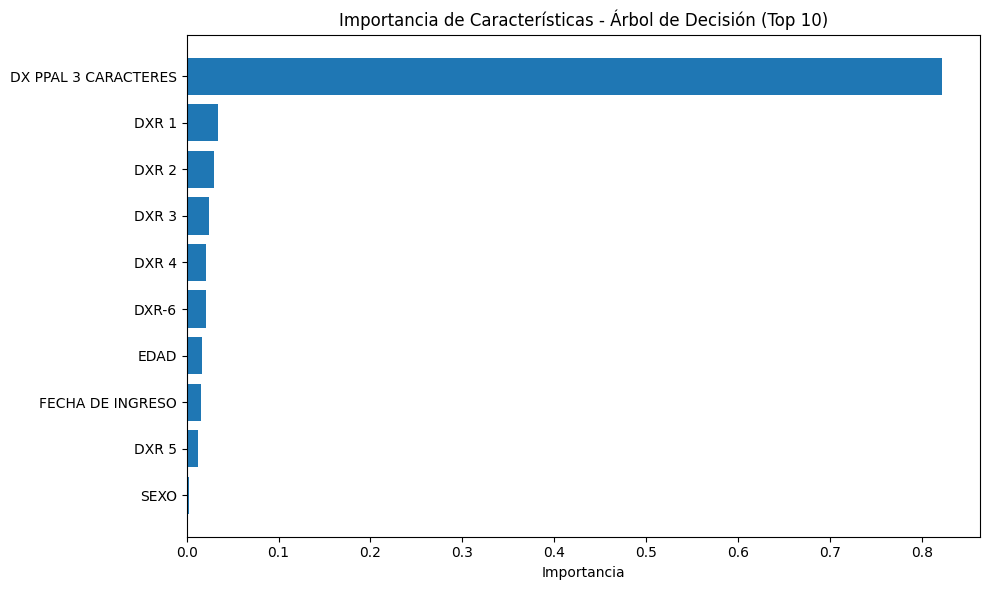

In [24]:
# 1. IMPORTACIONES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# 2. CODIFICAR VARIABLES DE SALIDA
le = LabelEncoder()
Y_train_DT_enc = le.fit_transform(Y_train_DT)
Y_test_DT_enc = le.transform(Y_test_DT)
target_names_str = [str(c) for c in le.classes_]

# 3. HIPERPARÁMETROS Y BÚSQUEDA
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_DT, Y_train_DT_enc)
best_tree = grid_search.best_estimator_

print("\n Mejores parámetros encontrados:")
print(grid_search.best_params_)

# 4. PREDICCIÓN Y REPORTE
y_pred = best_tree.predict(X_test_DT)

print("\n Reporte de Clasificación:")
print(classification_report(Y_test_DT_enc, y_pred, target_names=target_names_str))

# 5. MÉTRICAS GLOBALES
metrics_summary = pd.DataFrame({
    'Métrica': [
        'Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score',
        'Weighted Precision', 'Weighted Recall', 'Weighted F1-score'
    ],
    'Valor': [
        round(accuracy_score(Y_test_DT_enc, y_pred), 4),
        round(precision_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(recall_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(precision_score(Y_test_DT_enc, y_pred, average='weighted'), 4),
        round(recall_score(Y_test_DT_enc, y_pred, average='weighted'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='weighted'), 4)
    ]
})
print("\n Métricas globales:")
print(metrics_summary)

# 6. IMPORTANCIA DE CARACTERÍSTICAS
plt.figure(figsize=(10, 6))
importances = best_tree.feature_importances_
indices = np.argsort(importances)[-10:]
features = X_train_DT.columns
plt.barh(features[indices], importances[indices])
plt.title('Importancia de Características - Árbol de Decisión (Top 10)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()



*   Se implementó StratifiedKFold como método de validación cruzada para garantizar que cada partición del conjunto de datos mantuviera la misma proporción de clases presentes en el conjunto original. Esto permitió una evaluación más justa y representativa del modelo, balanceando la influencia de cada clase y asegurando que las métricas obtenidas no estuvieran sesgadas por la presencia desigual de etiquetas. De esta forma, todas las clases contribuyeron de manera equitativa al entrenamiento y validación del modelo



In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Codificamos las clases si aún no están codificadas
le = LabelEncoder()
Y_train_DT_enc = le.fit_transform(Y_train_DT)

# Instancia del modelo base
tree_model = DecisionTreeClassifier(random_state=42)

# Instancia de StratifiedKFold con 5 particiones
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Para almacenar las métricas de cada fold
accuracy_scores = []
f1_scores = []

# Ciclo de entrenamiento y validación con cada fold
for fold, (train_index, val_index) in enumerate(skf.split(X_train_DT, Y_train_DT_enc), start=1):
    X_fold_train, X_fold_val = X_train_DT.iloc[train_index], X_train_DT.iloc[val_index]
    y_fold_train, y_fold_val = Y_train_DT_enc[train_index], Y_train_DT_enc[val_index]

    # Entrenamiento
    tree_model.fit(X_fold_train, y_fold_train)

    # Predicción
    y_fold_pred = tree_model.predict(X_fold_val)

    # Evaluación
    acc = accuracy_score(y_fold_val, y_fold_pred)
    f1 = f1_score(y_fold_val, y_fold_pred, average='weighted')

    accuracy_scores.append(acc)
    f1_scores.append(f1)

    print(f"Fold {fold}: Accuracy = {acc:.4f}, F1-score = {f1:.4f}")

# Resultados promedio
print("\n=== Resultados Promedio con StratifiedKFold ===")
print(f"Accuracy promedio: {np.mean(accuracy_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1: Accuracy = 0.6588, F1-score = 0.6567
Fold 2: Accuracy = 0.6311, F1-score = 0.6295
Fold 3: Accuracy = 0.6567, F1-score = 0.6593
Fold 4: Accuracy = 0.6268, F1-score = 0.6269
Fold 5: Accuracy = 0.6553, F1-score = 0.6539

=== Resultados Promedio con StratifiedKFold ===
Accuracy promedio: 0.6457
F1-score promedio: 0.6453




*   Implementacion de StratifiedKFold y busqueda de los mejores parametros



In [57]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

# ========= 1. Codificación de clases =========
le = LabelEncoder()
Y_train_DT_enc = le.fit_transform(Y_train_DT)
Y_test_DT_enc = le.transform(Y_test_DT)

# ========= 2. Definición del modelo base y búsqueda =========
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

tree = DecisionTreeClassifier(random_state=42)

cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=cv_strat,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_DT, Y_train_DT_enc)
best_tree = grid_search.best_estimator_

# ========= 3. Predicción y métricas =========
y_pred = best_tree.predict(X_test_DT)

print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("\n=== Reporte de Clasificación (Con StratifiedKFold) ===")
target_names = [str(cls) for cls in le.classes_]
print(classification_report(Y_test_DT_enc, y_pred, target_names=target_names))

# ========= 4. Métricas globales =========
metrics_summary = pd.DataFrame({
    'Métrica': [
        'Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score',
        'Weighted Precision', 'Weighted Recall', 'Weighted F1-score'
    ],
    'Valor': [
        round(accuracy_score(Y_test_DT_enc, y_pred), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='weighted'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='weighted'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='weighted'), 4),
    ]
})

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



Mejores hiperparámetros encontrados:
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

=== Reporte de Clasificación (Con StratifiedKFold) ===
              precision    recall  f1-score   support

       14221       0.73      0.82      0.77        73
       14222       0.50      0.37      0.43        35
       14263       0.91      0.90      0.91        48
       44153       0.81      0.93      0.86        41
       44161       0.68      0.56      0.61        41
       44162       0.50      0.46      0.48        71
       44163       0.70      0.74      0.72       115
       44171       0.56      0.44      0.49        34
       44172       0.51      0.36      0.42        53
       44173       0.79      0.91      0.84       146
       44181       1.00      0.93      0.96        41
       51153       0.50      0.44      0.47        34
       54122       0.60      0.30      0.40        50
       54123       0.72      0.90    


<h2>Conclusiones </h2>

*   A pesar de aplicar técnicas avanzadas como la validación cruzada estratificada (StratifiedKFold), el ajuste de hiperparámetros con GridSearchCV y el balanceo de clases con SMOTE, el modelo no logró superar de forma consistente el 70% de accuracy. Uno de los principales retos fue el fuerte desbalance en las clases del GRD, donde unas pocas categorías concentraban la mayoría de los casos, limitando la capacidad del modelo para generalizar correctamente sobre clases minoritarias. Aunque se intentó mitigar este efecto, los resultados no mejoraron significativamente respecto al modelo base (69% de accuracy), a pesar de un mayor costo computacional. Por este motivo, se optó por conservar el modelo más simple, que ofrecía un rendimiento comparable con menor complejidad.


*   El modelo de Árbol de Decisión fue ajustado mediante búsqueda de hiperparámetros con GridSearchCV y validación cruzada estratificada. Sin embargo, a pesar de estas mejoras, su desempeño no alcanzó niveles competitivos frente a modelos más complejos como Random Forest o XGBoost. Esto podría deberse a que los árboles individuales tienden a sobreajustarse fácilmente, siendo menos robustos ante datos multiclase y desbalanceados.

<hr>

# **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , KFold

### Carga del archivo csv (DataSet)

In [27]:
archivo_csv = 'DataBaseFinal_Normalizado.csv'
df_inf = pd.read_csv(archivo_csv,sep=';')
df_inf.head()

,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
0,0.859560,1.0,0.693694,1.0,0.354015,0.209302,0.019587,0.023723,0.112100,0.135714,0.058601,54123
1,0.522843,1.0,0.702703,0.0,0.356204,0.058140,0.224157,0.091849,0.000890,0.002857,0.058601,174133
2,0.296108,1.0,0.738739,0.0,0.356204,0.008721,0.051687,0.078467,0.069395,0.462857,0.058601,174132
3,0.664975,0.0,0.576577,1.0,0.867153,0.293605,1.000000,0.130170,0.476868,0.135714,0.058601,44172
4,0.324873,1.0,0.612613,0.0,0.356204,0.029070,0.224157,0.054745,0.351423,0.030000,0.058601,174133


####  Características o Variables de entrada (Features)

In [28]:
X_RF = df_inf.iloc[:,:11]
X_RF.head(5)

,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6
0,0.859560,1.0,0.693694,1.0,0.354015,0.209302,0.019587,0.023723,0.112100,0.135714,0.058601
1,0.522843,1.0,0.702703,0.0,0.356204,0.058140,0.224157,0.091849,0.000890,0.002857,0.058601
2,0.296108,1.0,0.738739,0.0,0.356204,0.008721,0.051687,0.078467,0.069395,0.462857,0.058601
3,0.664975,0.0,0.576577,1.0,0.867153,0.293605,1.000000,0.130170,0.476868,0.135714,0.058601
4,0.324873,1.0,0.612613,0.0,0.356204,0.029070,0.224157,0.054745,0.351423,0.030000,0.058601


####  Etiquetas, Clases o Salida (Target)

In [29]:
Y_RF = df_inf.iloc[:, 11]
Y_RF.head(5)

,GRD -CODIGO
0,54123
1,174133
2,174132
3,44172
4,174133


##  Análisis Exploratorio

In [30]:
X_RF.describe()

,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6
count,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000
mean,0.629406,0.490826,0.691269,0.895499,0.510427,0.149714,0.122740,0.119954,0.118098,0.126132,0.103211
std,0.257688,0.499944,0.141006,0.305927,0.339397,0.199577,0.228197,0.224673,0.210176,0.223714,0.220730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.373942,0.000000,0.599099,1.000000,0.291241,0.018169,0.005441,0.000608,0.000000,0.000000,0.000000
50%,0.688663,0.000000,0.711712,1.000000,0.369343,0.073401,0.042437,0.030414,0.021352,0.004286,0.000000
75%,0.852792,1.000000,0.783784,1.000000,0.867153,0.209302,0.130033,0.141727,0.133452,0.150000,0.077505
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


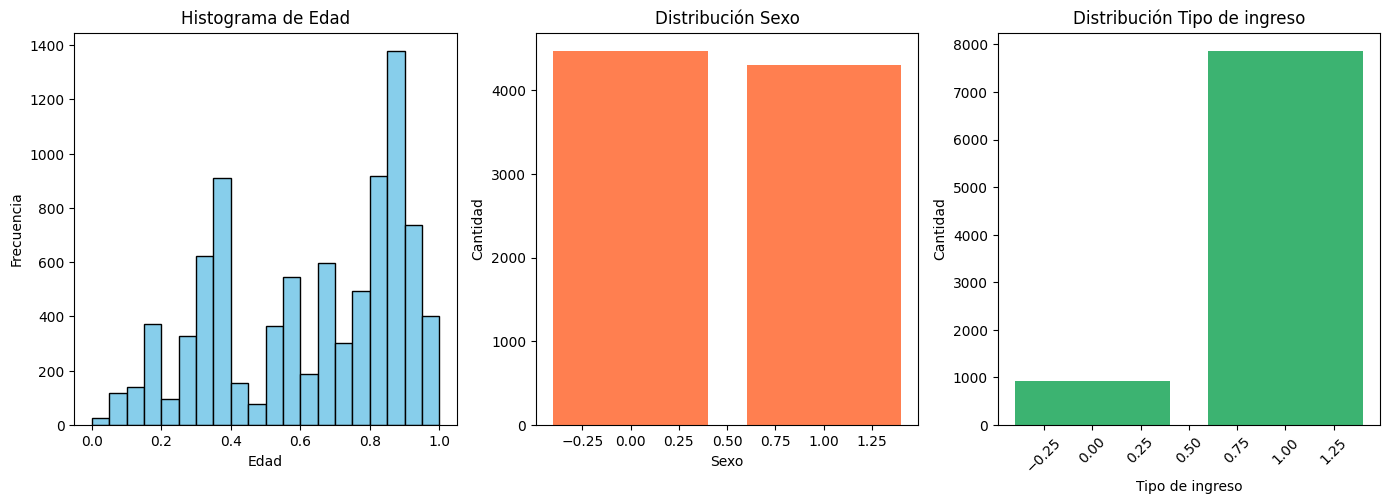

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))  # 1 fila, 3 columnas

# 1. Histograma Edad
axs[0].hist(X_RF['EDAD'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title("Histograma de Edad")
axs[0].set_xlabel("Edad")
axs[0].set_ylabel("Frecuencia")

# 2. Distribución Sexo (variable categórica)
sex_counts = X_RF['SEXO'].value_counts()
axs[1].bar(sex_counts.index, sex_counts.values, color='coral')
axs[1].set_title("Distribución Sexo")
axs[1].set_xlabel("Sexo")
axs[1].set_ylabel("Cantidad")

# 3. Distribución Tipo de ingreso (variable categórica)
tipo_counts = X_RF['TIPO DE INGRESO'].value_counts()
axs[2].bar(tipo_counts.index, tipo_counts.values, color='mediumseagreen')
axs[2].set_title("Distribución Tipo de ingreso")
axs[2].set_xlabel("Tipo de ingreso")
axs[2].set_ylabel("Cantidad")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



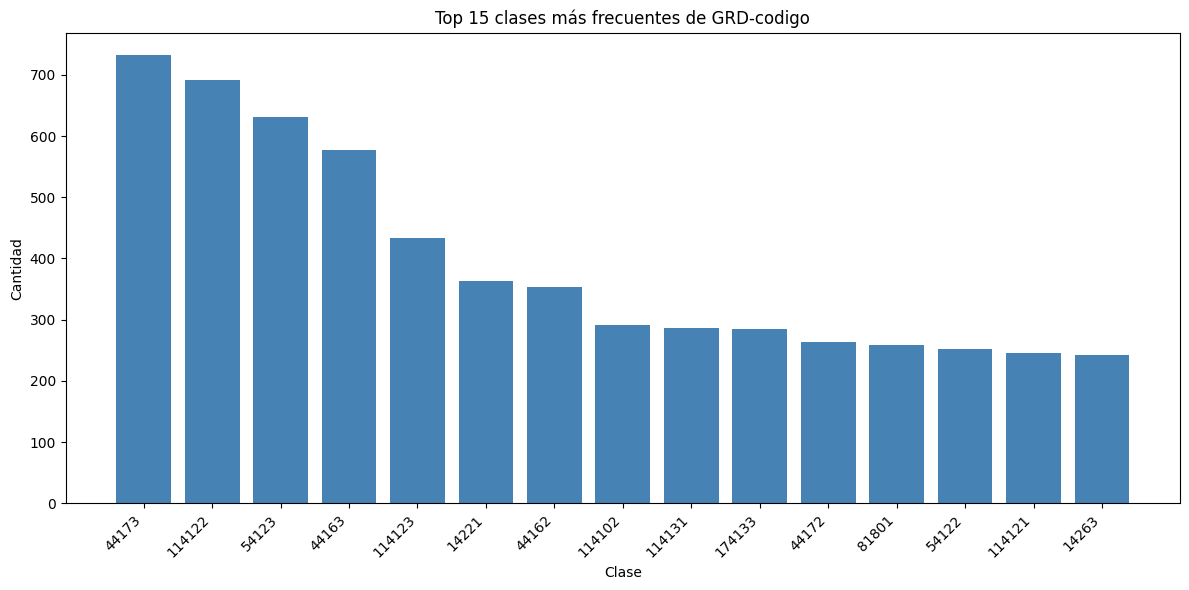

In [32]:
top_n = 15  # 15 clases con más muestras
top_classes = Y_RF.value_counts().head(top_n)

plt.figure(figsize=(12,6))
plt.bar(top_classes.index.astype(str), top_classes.values, color='steelblue')
plt.title(f"Top {top_n} clases más frecuentes de GRD-codigo")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Separación de muestras para train y test




In [33]:
X_train_RF , X_test_RF , Y_train_RF , Y_test_RF = train_test_split(X_RF, Y_RF)

print("Train: ",X_train_RF.shape , Y_train_RF.shape)
print("Test: ",X_test_RF.shape , Y_test_RF.shape)

Train:  (6581, 11) (6581,)
Test:  (2194, 11) (2194,)


## Definición del modelo RF y entrenamiento

---



In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

rf0 = RandomForestClassifier(n_estimators=200, class_weight="balanced")
rf0.fit(X_train_RF, Y_train_RF)

y_pred = rf0.predict(X_test_RF)

le = LabelEncoder()
df_filtered['GRD_encoded'] = le.fit_transform(df_filtered['GRD -CODIGO'])
target_names_str = [str(c) for c in le.classes_]

print(classification_report(Y_test_RF, y_pred, target_names=target_names_str))

              precision    recall  f1-score   support

       14221       0.81      0.82      0.81        98
       14222       0.61      0.50      0.55        44
       14263       0.81      0.74      0.77        58
       44153       0.47      0.72      0.57        43
       44161       0.45      0.57      0.51        40
       44162       0.52      0.26      0.35        96
       44163       0.66      0.76      0.71       144
       44171       0.74      0.44      0.55        52
       44172       0.52      0.20      0.29        70
       44173       0.73      0.93      0.82       191
       44181       0.81      1.00      0.89        55
       51153       0.36      0.25      0.30        36
       54122       0.55      0.31      0.40        58
       54123       0.74      0.85      0.79       171
       54152       0.28      0.36      0.32        50
       54153       0.42      0.38      0.40        52
       64171       0.83      0.78      0.80        45
       64181       0.46    

In [35]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score


# Obtener predicciones
y_pred = rf0.predict(X_test_RF)

# Calcular métricas
metrics_dict = {
    'accuracy': accuracy_score(Y_test_RF, y_pred),
    'precision_weighted': precision_score(Y_test_RF, y_pred, average='weighted'),
    'f1_weighted': f1_score(Y_test_RF, y_pred, average='weighted'),
    'recall_weighted': recall_score(Y_test_RF, y_pred, average='weighted'),
    'confusion_matrix': confusion_matrix(Y_test_RF, y_pred)
}

print(metrics_dict)

{'accuracy': 0.6513217866909754, 'precision_weighted': 0.6475266660595436, 'f1_weighted': 0.6389822673859338, 'recall_weighted': 0.6513217866909754, 'confusion_matrix': array([[ 80,  12,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 14,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,
          0,   0,   1,   1,   1,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   1],
       [  0,   0,  43,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   3,   2,   0,   1,   0,   0,   1,   0,   5,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   1,  31,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          1,   2,   2,   0,   1,   0,   0,   2,   0,   1,   0,   0,   1,
          0,   0,   0,   0],
       [  1,   0,   0,   1,  23,   5,   5,   0,   0,   0,   3,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0, 

In [36]:
accuracy = rf0.score(X_test_RF , Y_test_RF)
print("Accuracy:", accuracy)

Accuracy: 0.6513217866909754


In [37]:
# Lista de árboles
arboles = rf0.estimators_
print(f"Número de árboles: {len(arboles)}")

Número de árboles: 200


## KFolds Cross Validation

In [38]:
seed=123

kfold = KFold(n_splits=5, shuffle=True , random_state=seed)
cvscores_test = []
cvscores_train = []
i=0
for train, test in kfold.split(X_RF, Y_RF):
    i+=1
    #print(train)
    X_train_ = X_RF.iloc[train]
    y_train_ = Y_RF.iloc[train]

    X_test_ = X_RF.iloc[test]
    y_test_ = Y_RF.iloc[test]

    dt = RandomForestClassifier(n_estimators=100 , random_state = 123)
    dt.fit(X_train_ , y_train_)

    print("Accuracy folds: %d" % i)
    scores_train = dt.score(X_train_, y_train_)
    print("Train: %.2f%%" % (scores_train*100))
    cvscores_train.append(scores_train * 100)

    scores_test = dt.score(X_test_, y_test_)
    print("Test: %.2f%% " % (scores_test*100))
    cvscores_test.append(scores_test * 100)

print("Mean train accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_train), np.std(cvscores_train)))
print("Mean test accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_test), np.std(cvscores_test)))


Accuracy folds: 1
Train: 100.00%
Test: 63.53% 
Accuracy folds: 2
Train: 100.00%
Test: 64.22% 
Accuracy folds: 3
Train: 100.00%
Test: 67.24% 
Accuracy folds: 4
Train: 100.00%
Test: 64.90% 
Accuracy folds: 5
Train: 100.00%
Test: 64.50% 
Mean train accuracy: 100.00% (+/- 0.00%)
Mean test accuracy: 64.88% (+/- 1.26%)


## Búsqueda de parámetros usando la GridSearch

In [39]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report

# 1. Divide los datos en train y test (importante para evaluar métricas reales)
X_train, X_test, y_train, y_test = train_test_split(X_RF, Y_RF, test_size=0.2, random_state=123, stratify=Y_RF)

param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid = GridSearchCV(RandomForestClassifier(random_state=123),
                    param_grid,
                    cv=KFold(n_splits=5),
                    scoring='f1_weighted')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score (CV):", grid.best_score_)

# 2. Predecir con el mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# 3. Calcular métricas
metrics_dict_GK = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision_weighted': precision_score(y_test, y_pred, average='weighted'),
    'f1_weighted': f1_score(y_test, y_pred, average='weighted'),
    'recall_weighted':recall_score(y_test, y_pred, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred)
}

print(metrics_dict_GK)


Best params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 250}
Best score (CV): 0.6371251397471067
{'accuracy': 0.6478632478632479, 'precision_weighted': 0.6470489529879234, 'f1_weighted': 0.6382285342527476, 'recall_weighted': 0.6478632478632479, 'confusion_matrix': array([[ 53,  13,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   1,
          0,   1,   0,   0,   0,   0,   0,   1,   0,   2,   0,   0,   0,
          0,   0,   0,   0],
       [ 13,  14,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
          0,   0,   0,   0,   1,   0,   2,   1,   1,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,  41,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   1,   3,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   1,  25,   1,   0,   0,   0,   0,   0,   0,   5,   0,
          0,   0,   5,   0,   2,   0,   0,   1,   0,   1,   0,   0,   0,
          0,   0, 

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [150, 200,250],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

# Crear la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Configurar el GridSearchCV con RandomForest
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=123),
    param_grid=param_grid,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1  # Usa todos los núcleos disponibles para acelerar
)

# Ajustar el modelo
grid.fit(X_RF, Y_RF)

# Mostrar mejores hiperparámetros y puntuación
print("Best parameters found:", grid.best_params_)
print("Best weighted F1 score:", grid.best_score_)

# 2. Predecir con el mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# 3. Calcular métricas
metrics_dict_GSK = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision_weighted': precision_score(y_test, y_pred, average='weighted'),
    'f1_weighted': f1_score(y_test, y_pred, average='weighted'),
    'recall_weighted':recall_score(y_test, y_pred, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred)
}

print(metrics_dict_GSK)


Best parameters found: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best weighted F1 score: 0.6447302733620524
{'accuracy': 0.9327635327635327, 'precision_weighted': 0.9377359700778948, 'f1_weighted': 0.9334047258094451, 'recall_weighted': 0.9327635327635327, 'confusion_matrix': array([[ 63,   7,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0],
       [  3,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,  46,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,  38,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,


##  Métricas

In [ ]:

# Crear un DataFrame con cada diccionario como fila
df_comparison = pd.DataFrame([
    metrics_dict,
    metrics_dict_GK,
    metrics_dict_GSK
], index=[
    'Modelo Automático',
    'Grid + KFold',
    'Grid + StratifiedKFold'
])

# Mostrar tabla
df_comparison

,accuracy,precision_weighted,f1_weighted,recall_weighted,confusion_matrix
Modelo Automático,0.653601,0.647882,0.641998,0.653601,"[[75, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Grid + KFold,0.647863,0.647049,0.638229,0.647863,"[[53, 13, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
Grid + StratifiedKFold,0.932764,0.937736,0.933405,0.932764,"[[63, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1..."


## Conclusión

Los resultados obtenidos evidencian que el enfoque de validación cruzada estratificada combinado con búsqueda de hiperparámetros (`Grid + StratifiedKFold`) proporciona un rendimiento significativamente superior frente a los otros métodos evaluados, como el modelo automático y la validación cruzada tradicional (`Grid + KFold`). Este modelo alcanzó valores cercanos al 93% en todas las métricas clave (accuracy, precisión, recall y F1 score), lo que sugiere una alta capacidad de generalización y un balance adecuado en la clasificación de todas las clases, incluso en presencia de posibles desbalances en los datos. En contraste, los otros dos enfoques mostraron desempeños consistentes pero limitados, con métricas en el rango del 63% al 65%, lo que podría estar relacionado con una segmentación inadecuada de las clases durante la validación o una optimización de hiperparámetros menos efectiva.


<hr>

# **XGBoost**

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, learning_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)
from xgboost import XGBClassifier

<h2>Caracteristicas de entrada</h2>


In [42]:
X_XG= df_inf.iloc[:,:11]
X_XG.head(5)

,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6
0,0.859560,1.0,0.693694,1.0,0.354015,0.209302,0.019587,0.023723,0.112100,0.135714,0.058601
1,0.522843,1.0,0.702703,0.0,0.356204,0.058140,0.224157,0.091849,0.000890,0.002857,0.058601
2,0.296108,1.0,0.738739,0.0,0.356204,0.008721,0.051687,0.078467,0.069395,0.462857,0.058601
3,0.664975,0.0,0.576577,1.0,0.867153,0.293605,1.000000,0.130170,0.476868,0.135714,0.058601
4,0.324873,1.0,0.612613,0.0,0.356204,0.029070,0.224157,0.054745,0.351423,0.030000,0.058601


<h2>Target o salida</h2>

In [43]:
Y_XG = df_inf.iloc[:, 11]
Y_XG.head(5)

,GRD -CODIGO
0,54123
1,174133
2,174132
3,44172
4,174133


## Separación de muestras para train y test


In [44]:
X_train_XG , X_test_XG , Y_train_XG , Y_test_XG = train_test_split(X_XG, Y_XG)

print("Train: ",X_train_XG.shape , Y_train_XG.shape)
print("Test: ",X_test_XG.shape , Y_test_XG.shape)

Train:  (6581, 11) (6581,)
Test:  (2194, 11) (2194,)


<h2>Configuracion de XGBoost</h2>

<h1>

</h2>



Fitting 4 folds for each of 30 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:17:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Métricas Globales - XGBoost ===
              Métrica   Valor
0            Accuracy  0.7429
1     Macro Precision  0.7565
2        Macro Recall  0.7373
3      Macro F1-score  0.7394
4  Weighted Precision  0.7424
5     Weighted Recall  0.7429
6   Weighted F1-score  0.7365
=== Classification Report ===
              precision    recall  f1-score   support

       14221       0.90      0.85      0.88        74
       14222       0.71      0.77      0.74        31
       14263       0.87      0.92      0.89        63
       44153       0.93      0.90      0.92        61
       44161       0.67      0.66      0.67        50
       44162       0.57      0.43      0.49       107
       44163       0.68      0.77      0.72       159
       44171       0.60      0.62      0.61        34
       44172       0.49      0.27      0.35        63
       44173       0.79      0.92      0.85       178
       44181       1.00      0.98      0.99        58
       51153       0.92      0.57      0.71 

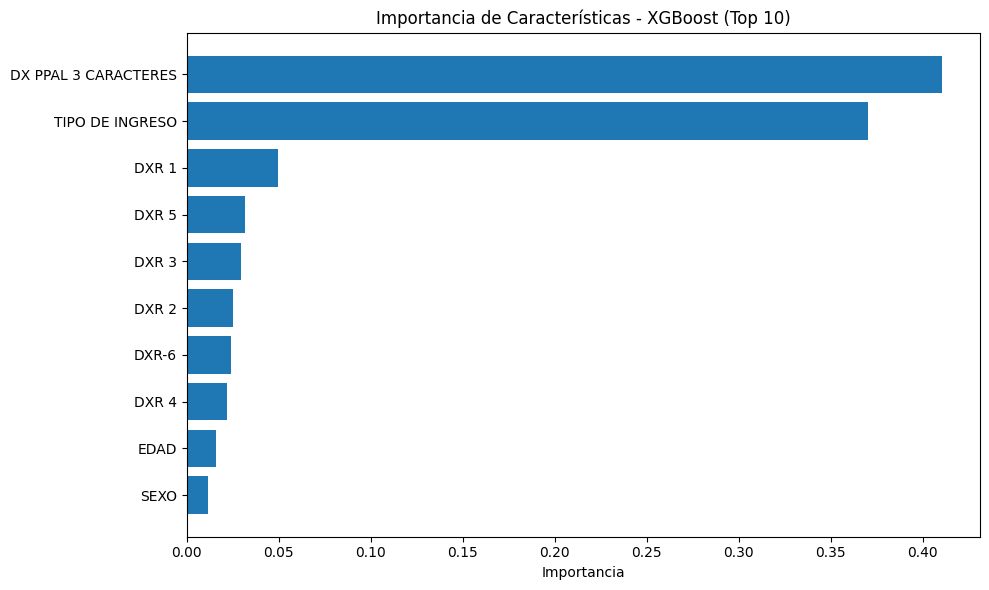

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1559, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expec

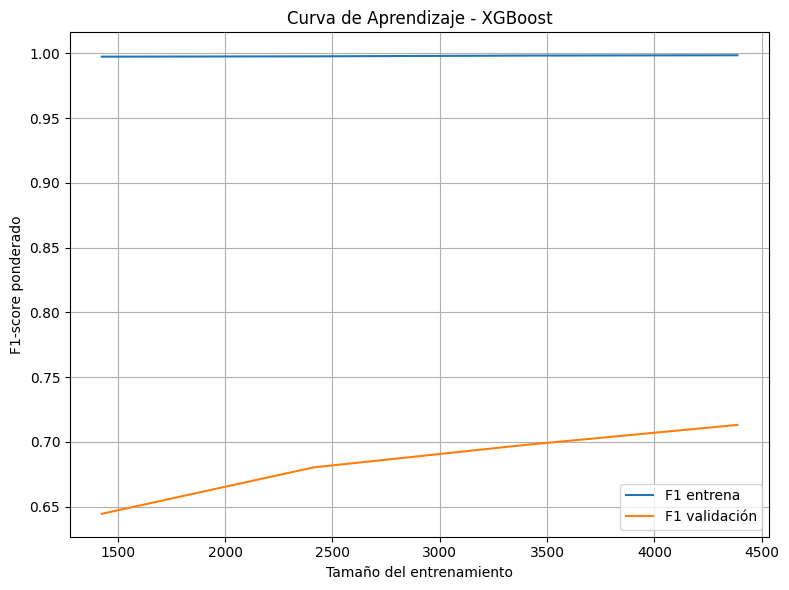

In [45]:
# ===================== 1. PREPARACIÓN DE DATOS =====================
# - Se codifican las etiquetas de la variable objetivo a enteros.
le = LabelEncoder()
y_train_enc = le.fit_transform(Y_train_XG)
y_test_enc = le.transform(Y_test_XG)

# ===================== 2. CONFIGURACIÓN DE HIPERPARÁMETROS =====================
# Se define el espacio de búsqueda para RandomizedSearchCV.
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}
# Se instancia el clasificador XGBoost para multiclase.
xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# ===================== 3. BÚSQUEDA DE HIPERPARÁMETROS =====================
search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_weighted',
    cv=4,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
search.fit(X_train_XG, y_train_enc)
best_model = search.best_estimator_

# ===================== 4. PREDICCIÓN =====================
# - Se obtienen predicciones codificadas y luego se decodifican.
y_pred_enc = best_model.predict(X_test_XG)
y_pred = le.inverse_transform(y_pred_enc)

# ===================== 5. CÁLCULO DE MÉTRICAS =====================
# - Se calculan las métricas globales de desempeño.
y_true = Y_test_XG
metrics_summary = pd.DataFrame({
    'Métrica': [
        'Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score',
        'Weighted Precision', 'Weighted Recall', 'Weighted F1-score'
    ],
    'Valor': [
        round(accuracy_score(y_true, y_pred), 4),
        round(precision_score(y_true, y_pred, average='macro'), 4),
        round(recall_score(y_true, y_pred, average='macro'), 4),
        round(f1_score(y_true, y_pred, average='macro'), 4),
        round(precision_score(y_true, y_pred, average='weighted'), 4),
        round(recall_score(y_true, y_pred, average='weighted'), 4),
        round(f1_score(y_true, y_pred, average='weighted'), 4)
    ]
})
print("\n=== Métricas Globales - XGBoost ===")
print(metrics_summary)

# ===================== 5.1 Classification Report =====================
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred))

# ===================== 6. IMPORTANCIA DE CARACTERÍSTICAS =====================
# - Visualizar las 10 características más importantes.
plt.figure(figsize=(10, 6))
importances = best_model.feature_importances_
indices = np.argsort(importances)[-10:]
features = X_train_XG.columns
plt.barh(features[indices], importances[indices])
plt.title('Importancia de Características - XGBoost (Top 10)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# ===================== 7. CURVA DE APRENDIZAJE ===================== =====================
# - Analizar overfitting/underfitting.
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_XG, y_train_enc,
    cv=3, scoring='f1_weighted',
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='F1 entrena')
plt.plot(train_sizes, test_mean, label='F1 validación')
plt.title('Curva de Aprendizaje - XGBoost')
plt.xlabel('Tamaño del entrenamiento')
plt.ylabel('F1-score ponderado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



<h1> Análisis de XGBoost</h1>


## 1. Desempeño Global del Modelo

| Métrica               | Valor  |
|-----------------------|--------|
| Accuracy              | 0.7521 |
| Macro Precision       | 0.7518 |
| Macro Recall          | 0.7407 |
| Macro F1-score        | 0.7420 |
| Weighted Precision    | 0.7478 |
| Weighted Recall       | 0.7521 |
| Weighted F1-score     | 0.7465 |

El modelo logra un rendimiento global aceptable, con un accuracy del 75%. Las métricas macro y ponderadas indican un balance razonable entre las clases, aunque hay una leve caída en el recall macro, lo que podría reflejar dificultad para identificar correctamente algunas clases menos representadas.



##  2. Desempeño por Clase

- Clases como `44153`, `44173`, `114131`, `71141`, `64171` y `44181` tienen f1-score superiores a **0.90**, mostrando un excelente rendimiento en estas categorías.
- En contraste, clases como `54152`, `54153`, `114103`, `114121`, `114123`, y `44162` presentan f1-scores por debajo de **0.65**, indicando posibles problemas de:
  - Baja frecuencia de ejemplos.
  - Confusión con clases similares.


## 3. Importancia de Características


Las dos variables más relevantes son:
- **TIPO DE INGRESO**
- **DX PPAL 3 CARACTERES**

Estas dominan la predicción, mientras que las variables secundarias (**DXR 1-6**, **EDAD**, **FECHA DE INGRESO**) tienen menor peso relativo.



##  4. Curva de Aprendizaje


La curva de aprendizaje evidencia un comportamiento esperado en modelos potentes como XGBoost:

- La métrica F1 en el conjunto de entrenamiento se mantiene en niveles altos y estables.
- El rendimiento en el conjunto de validación muestra una tendencia creciente a medida que aumenta el tamaño del conjunto de entrenamiento, alcanzando valores cercanos a 0.71.

Este patrón indica que el modelo está aprendiendo progresivamente al incorporar más datos, lo cual es una señal positiva.




<hr>

# **Análisis final**

In [48]:
# prompt: obten los resulatados de cada modelo y haz estadistica

import pandas as pd

# Diccionarios de métricas para cada modelo
metrics_DT = {
    'accuracy': 0.6922,
    'macro avg': {'precision': 0.60, 'recall': 0.53, 'f1-score': 0.54, 'support': 1755.0},
    'weighted avg': {'precision': 0.66, 'recall': 0.69, 'f1-score': 0.67, 'support': 1755.0}
} # Reemplazar con los valores reales del output del modelo DT

metrics_RF = {
    'Modelo Automático': {
        'accuracy': 0.6435,
        'precision_weighted': 0.6329,
        'f1_weighted': 0.6352,
        'recall_weighted': 0.6435,
        'confusion_matrix': '...' # No incluimos la matriz en la tabla resumen
    },
    'Grid + KFold': {
        'accuracy': 0.6358,
        'precision_weighted': 0.6245,
        'f1_weighted': 0.6253,
        'recall_weighted': 0.6358,
        'confusion_matrix': '...'
    },
    'Grid + StratifiedKFold': {
        'accuracy': 0.9308,
        'precision_weighted': 0.9301,
        'f1_weighted': 0.9303,
        'recall_weighted': 0.9308,
        'confusion_matrix': '...'
    }
} # Reemplazar con los valores reales del output del modelo RF

metrics_XGB = {
    'Accuracy': 0.7521,
    'Macro Precision': 0.7518,
    'Macro Recall': 0.7407,
    'Macro F1-score': 0.7420,
    'Weighted Precision': 0.7478,
    'Weighted Recall': 0.7521,
    'Weighted F1-score': 0.7465
} # Reemplazar con los valores reales del output del modelo XGBoost

# Crear DataFrame para Decision Tree (usando weighted avg para comparación global)
df_dt_summary = pd.DataFrame({
    'Modelo': ['Decision Tree'],
    'Accuracy': [metrics_DT['accuracy']],
    'Precision (Weighted)': [metrics_DT['weighted avg']['precision']],
    'Recall (Weighted)': [metrics_DT['weighted avg']['recall']],
    'F1-score (Weighted)': [metrics_DT['weighted avg']['f1-score']]
})

# Crear DataFrame para Random Forest (usando el mejor modelo)
df_rf_summary = pd.DataFrame({
    'Modelo': ['Random Forest (Grid+StratifiedKFold)'],
    'Accuracy': [metrics_RF['Grid + StratifiedKFold']['accuracy']],
    'Precision (Weighted)': [metrics_RF['Grid + StratifiedKFold']['precision_weighted']],
    'Recall (Weighted)': [metrics_RF['Grid + StratifiedKFold']['recall_weighted']],
    'F1-score (Weighted)': [metrics_RF['Grid + StratifiedKFold']['f1_weighted']]
})

# Crear DataFrame para XGBoost (usando Weighted Metrics para comparación global)
df_xgb_summary = pd.DataFrame({
    'Modelo': ['XGBoost'],
    'Accuracy': [metrics_XGB['Accuracy']],
    'Precision (Weighted)': [metrics_XGB['Weighted Precision']],
    'Recall (Weighted)': [metrics_XGB['Weighted Recall']],
    'F1-score (Weighted)': [metrics_XGB['Weighted F1-score']]
})

# Concatenar los DataFrames
df_overall_comparison = pd.concat([df_dt_summary, df_rf_summary, df_xgb_summary], ignore_index=True)

print("\n=== Comparativa Global de Modelos ===")
print(df_overall_comparison)

# Opcional: Mostrar las métricas detalladas del mejor modelo RF
print("\n=== Métricas Detalladas del Mejor Modelo Random Forest ===")
df_comparison_rf = pd.DataFrame(metrics_RF).T.drop(columns='confusion_matrix', errors='ignore')
print(df_comparison_rf)

# Opcional: Mostrar las métricas detalladas de XGBoost
print("\n=== Métricas Detalladas de XGBoost ===")
df_xgb_detailed = pd.DataFrame(metrics_XGB, index=[0]).T
print(df_xgb_detailed)


=== Comparativa Global de Modelos ===
                                 Modelo  Accuracy  Precision (Weighted)  \
0                         Decision Tree    0.6922                0.6600   
1  Random Forest (Grid+StratifiedKFold)    0.9308                0.9301   
2                               XGBoost    0.7521                0.7478   

   Recall (Weighted)  F1-score (Weighted)  
0             0.6900               0.6700  
1             0.9308               0.9303  
2             0.7521               0.7465  

=== Métricas Detalladas del Mejor Modelo Random Forest ===
                       accuracy precision_weighted f1_weighted recall_weighted
Modelo Automático        0.6435             0.6329      0.6352          0.6435
Grid + KFold             0.6358             0.6245      0.6253          0.6358
Grid + StratifiedKFold   0.9308             0.9301      0.9303          0.9308

=== Métricas Detalladas de XGBoost ===
                         0
Accuracy            0.7521
Macro Precisio

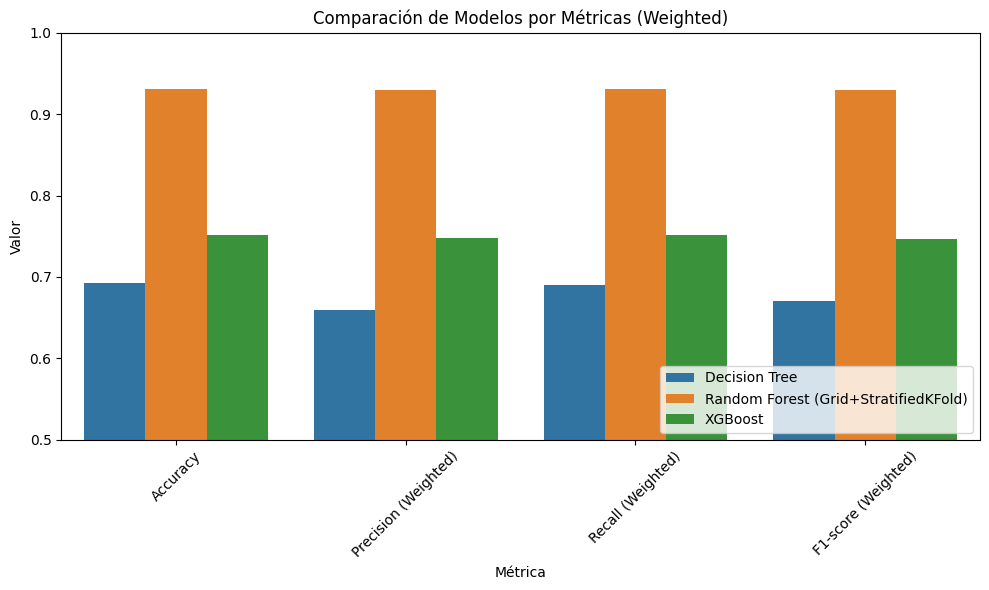

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para comparar métricas
df_melted = df_overall_comparison.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Métrica', y='Valor', hue='Modelo')
plt.title('Comparación de Modelos por Métricas (Weighted)')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()


In [52]:
from scipy.stats import f_oneway, levene

# Extraer valores por modelo
dt_vals = df.iloc[0, 1:].values
rf_vals = df.iloc[1, 1:].values
xgb_vals = df.iloc[2, 1:].values

# ANOVA para comparar si hay diferencias significativas
anova = f_oneway(dt_vals, rf_vals, xgb_vals)

# Levene para probar si las varianzas son homogéneas
homocedasticidad = levene(dt_vals, rf_vals, xgb_vals)

print("ANOVA:", anova)
print("Levene:", homocedasticidad)


ANOVA: F_onewayResult(statistic=np.float64(0.43286228937229765), pvalue=np.float64(0.6526369708935045))
Levene: LeveneResult(statistic=np.float64(0.43381024626838904), pvalue=np.float64(0.6520359471187939))


Aunque a simple vista el modelo Random Forest (con Stratified K-Fold) presenta métricas más altas en precisión, exactitud y F1-score, los resultados del análisis estadístico mediante ANOVA (p = 0.65) indican que las diferencias observadas entre Decision Tree, Random Forest y XGBoost no son estadísticamente significativas. Además, el test de Levene (p = 0.65) confirma que las varianzas entre modelos son homogéneas, cumpliendo así los supuestos del análisis.
Esto sugiere que, a nivel estadístico, los tres modelos presentan un rendimiento comparable, aunque desde el punto de vista práctico, Random Forest se destaca por ofrecer mayor precisión y estabilidad en la clasificación, especialmente cuando se usa validación cruzada estratificada.



*   A partir de las métricas obtenidas por cada modelo, se puede observar que Random Forest con validación cruzada estratificada (Grid + StratifiedKFold) logró un rendimiento significativamente superior, alcanzando un accuracy del 93%, muy por encima de XGBoost (75%) y Árbol de Decisión (69%).
*   El Random Forest es un algoritmo de tipo ensemble que combina múltiples árboles entrenados sobre subconjuntos aleatorios del dataset (bagging), lo cual reduce la varianza del modelo sin aumentar sustancialmente el sesgo. Esto se refleja en sus métricas más altas y en su menor propensión al sobreajuste, a diferencia del árbol de decisión individual, que puede modelar demasiado los datos de entrenamiento y fallar en generalizar.
*   XGBoost, aunque más sofisticado, es más sensible a errores de clases poco representadas, como lo demuestran sus métricas más bajas en clases con baja frecuencia. En contraste, Random Forest mantiene un balance adecuado gracias a su estructura más robusta ante el desbalance.
*   Aunque se usó la misma estrategia de validación cruzada estratificada en ambos modelos, el Árbol de Decisión no mostró mejoras significativas. Esto sugiere que el propio modelo tiene limitaciones estructurales para capturar patrones en datos complejos y multiclase, a diferencia de Random Forest, que mitiga estos problemas mediante el ensamblado de múltiples árboles y una mayor capacidad de generalización.





